Mount The Required Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import all the necessary libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from wordcloud import WordCloud, STOPWORDS


from joblib import dump,load
#%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import random
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from nltk.corpus import stopwords

Read CSV File

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Restaurant Rating Prediction/zomato.csv",nrows=20000)

Overview of Data

In [ ]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,https://www.zomato.com/bangalore/mudpipe-cafe-...,"1, KDP Building, 4th Floor, Near Forum Mall, A...",Mudpipe Cafe,Yes,Yes,4.5/5,1878,+91 9631220007,BTM,Cafe,"Chaat, Nachos, Peri Peri Pizza, Wedges, Milk S...","Cafe, Continental, Burger",900,"[('Rated 4.0', 'RATED\n Amazing ambience. Goo...","['Crispy Spinach Corn Cheese Stick', 'Alfredo ...",Delivery,Jayanagar
19996,https://www.zomato.com/bangalore/alif-restaura...,"312, 15th cross, 5th Phase, JP Nagar, Bangalore",Alif Restaurant,Yes,No,3.6/5,27,+91 8667307119,JP Nagar,Casual Dining,NaN,"North Indian, Chinese",600,"[('Rated 3.0', ""RATED\n It's a medium size ho...","['Pepper Chicken', 'Grilled Chicken', 'Dum Bri...",Delivery,Jayanagar
19997,https://www.zomato.com/bangalore/black-deer-ko...,"18th Main Park, 17th H Main Road, Koramangala ...",Black Deer,Yes,No,4.4/5,149,080 43751110\r\n+91 9886552002,Koramangala 5th Block,"Takeaway, Delivery","Chocolate Fudge, Chocolate Shake, Bubble Gum S...","Beverages, Desserts",350,"[('Rated 4.0', ""RATED\n I'm not a big fan of ...","['Red Velvet Ice Cream Sundaes', 'Fruit Basket...",Delivery,Jayanagar
19998,https://www.zomato.com/bangalore/supreme-birya...,Delivery Only,Supreme Biryani,Yes,No,NaN,0,+91 9606441698,South Bangalore,"Takeaway, Delivery",NaN,Biryani,400,[],"['Masaledar Egg Biryani [Serves 2]', 'Biryani ...",Delivery,Jayanagar


All Column information

rate , phone , location , rest_type , dish_liked , cuisines, approx_cost(for two people) have missing values

In [ ]:
df['votes'].describe()

count    20000.000000
mean       268.516550
std        749.398815
min          0.000000
25%          6.000000
50%         41.000000
75%        193.000000
max      16345.000000
Name: votes, dtype: float64

In [ ]:
# drop unnecessary columns
column_to_drop = ['address','url' ,'listed_in(city)', 'phone']
df.drop(columns=column_to_drop, axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         20000 non-null  object
 1   online_order                 20000 non-null  object
 2   book_table                   20000 non-null  object
 3   rate                         17129 non-null  object
 4   votes                        20000 non-null  int64 
 5   location                     19996 non-null  object
 6   rest_type                    19916 non-null  object
 7   dish_liked                   9099 non-null   object
 8   cuisines                     19987 non-null  object
 9   approx_cost(for two people)  19934 non-null  object
 10  reviews_list                 20000 non-null  object
 11  menu_item                    20000 non-null  object
 12  listed_in(type)              20000 non-null  object
dtypes: int64(1), object(12)
memory 

###  2.2.2 Remove Duplicates

In [ ]:
# check for duplicate values
print("No of Duplicates in dataset:  ",df.duplicated().sum())

No of Duplicates in dataset:   2242


In [ ]:
# drop the duplicates
df.drop_duplicates(inplace=True)

### 2.2.3 Removing Null values
Q.2) Is there NULL values present in dataset? If yes then many they are (in %)?

In [ ]:
# check for null values
((df.isna().sum()/df.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           13.14
votes                           0.00
location                        0.02
rest_type                       0.44
dish_liked                     52.18
cuisines                        0.07
approx_cost(for two people)     0.32
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
dtype: float64

#### Observation:
- We can oberve that 52% dish_liked is missing as well as 13% rate values are missing.
- If we throw everything out, mean we are loosing more than 60% points.

**Q.3) Can we do something, can we save some of the points?**

But before removing NULL values lets understand, Rate colomn.

In [ ]:
# check for unique values in the rate column
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5'], dtype=object)

#### Observation:
- There are some points which has 'NEW' rating and '-' rating, which is completely incorrect.

In [ ]:
# removed 'NEW' and '-' from rate coloumn and put NaN value.
df['rate'] = df['rate'].replace('NEW',np.NaN)
df['rate'] = df['rate'].replace('-',np.NaN)

In [ ]:
# chcek again data.rate coloumn. we can see nan values.
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5'], dtype=object)

We can see that by default it has '/5' (divide by 5) arithmatic character, first we will remove this then proceed.

In [ ]:
((df.isna().sum()/df.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           18.63
votes                           0.00
location                        0.02
rest_type                       0.44
dish_liked                     52.18
cuisines                        0.07
approx_cost(for two people)     0.32
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
dtype: float64

Note : 'rate' NaN % was 10.15 initially now it is 14.11. Because some values took 'NEW' and '-' values which we removed and this is actual NaN % for rate coloumn.

In [ ]:
## apply takes a function and applies it to all values of pandas series.

df['rate'] = df['rate'].astype(str)

## removed all '/5' and replace with ''
df['rate'] = df['rate'].apply(lambda r: r.replace('/5',''))

## convert rate to float
df['rate'] = df['rate'].apply(lambda r: float(r))

In [ ]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
19994    3.9
19995    4.5
19996    3.6
19997    4.4
19998    NaN
Name: rate, Length: 17758, dtype: float64

***As we understood Rate colomn above, lets understand, dish_liked***<br>
But before that first go throght "Review_List"

In [ ]:
type(df.reviews_list[0])

str

In [ ]:
# https://stackoverflow.com/questions/15197673/using-pythons-eval-vs-ast-literal-eval
## ast.literal_eval raises an exception if the input isn't a valid Python datatype, so the code won't be executed if it's not.

# return to a list of tuples
df.reviews_list = df.reviews_list.apply(lambda x: ast.literal_eval(x))
type(df.reviews_list[0])

list

In [ ]:
# check for the first item in list
df.reviews_list[0][0]

('Rated 4.0',
 'RATED\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.')

In [ ]:
# check for the second item in list
df.reviews_list[0][1]

('Rated 4.0',
 'RATED\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\nCheers')

#### Observation:
- We can see that in "Review_List" starting line come up with rating. 'Rated 4.0'.
- We can use this values and filled up 'Rate' colomn.

**Q3A. Can we use this values as fill up in 'Rate' Colomn wherever it is missing? If yes then image we have saved that data point,ie information.**

In [ ]:
# extract the rate for the first input from the review column
extracted = [float(i[0].replace('Rated','').strip()) for i in df.reviews_list[0]]
extracted

[4.0, 4.0, 2.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0]

Above are review for particular restaurant, we can use mean value.

In [ ]:
extracted_mean = round((sum(extracted)/len(extracted)),1)
extracted_mean

4.1

- This is great. Lets Compare this value with 'Rate' colomn value.

In [ ]:
print("Extracted Rate: ",extracted_mean)
print("Original Rate: ",df.rate[0])

Extracted Rate:  4.1
Original Rate:  4.1


This is brillliant, lets do for all.

In [ ]:
def extract_features_from_review_list(x):
    '''
    extract the rate value out of a string inside tuple
    '''
    # ensure that x is not Null and there is more than one rate
    if not x or len(x) <= 1:
        return None
    
    ## checked give values is text or not, if it is text then removed 'Rated', convert string to float.
    rate = [float(i[0].replace('Rated','').strip())  for i in x if type(i[0])== str]
    
    ## return average value
    return round((sum(rate)/len(rate)),1)

In [ ]:
# create new column
df['review_rate']  = df.reviews_list.apply(lambda x : extract_features_from_review_list(x))

In [ ]:
## Compare "Original Rate" vs "Rate extracted from Review List"
df.loc[:,['rate','review_rate']].sample(10,random_state=1)

,rate,review_rate
2920,3.9,3.4
10760,3.5,4.9
3314,2.7,4.0
2012,3.2,3.2
17538,4.3,4.4
1248,3.3,3.2
16647,4.0,4.0
8674,NaN,NaN
15693,3.3,3.3
13451,4.0,4.7


- Quite Closer.
- Ok, so we can replace missing value with this new adjustment.

In [ ]:
# get the before number of null values
df.rate.isna().sum()

3308

In [ ]:
## https://stackoverflow.com/questions/26535563/querying-for-nan-and-other-names-in-pandas

## finding rate = NaN and review_rate == not NaN
df.query('rate != rate & review_rate == review_rate')[:5]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),review_rate
72,Spicy Tandoor,No,No,NaN,0,Banashankari,Quick Bites,NaN,North Indian,150,"[(Rated 4.0, RATED\n cost for chicken rolls i...",[],Delivery,4.5
90,Me And My Cake,No,No,NaN,0,Banashankari,Delivery,NaN,"Bakery, Desserts",500,"[(Rated 1.0, RATED\n Do not order anything. T...",[],Delivery,1.0
110,Hari Super Sandwich,No,No,NaN,0,Banashankari,"Takeaway, Delivery",NaN,"Sandwich, Pizza, Beverages",200,"[(Rated 1.0, RATED\n I have been here many ti...",[],Delivery,1.0
116,Wood Stove,No,No,NaN,0,Banashankari,"Takeaway, Delivery",NaN,South Indian,150,"[(Rated 5.0, RATED\n Wow this food is great ?...",[],Delivery,5.0
138,Sri Murari Family Restaurant,No,No,NaN,0,Banashankari,Quick Bites,NaN,Biryani,250,"[(Rated 4.0, RATED\n This tiny mess near kath...",[],Delivery,4.5


In [ ]:
# https://stackoverflow.com/questions/26535563/querying-for-nan-and-other-names-in-pandas
# https://stackoverflow.com/questions/24036911/how-to-update-values-in-a-specific-row-in-a-python-pandas-dataframe


## finding index where rate==NaN and review_rate== not NaN
nan_index = df.query('rate != rate & review_rate == review_rate').index
for i in nan_index:
    df.loc[i,'rate'] = df.loc[i,'review_rate'] 

In [ ]:
# update the number of null values now
df.rate.isna().sum()

2759

Please notice we have saved more than 1000 points.

In [ ]:
# check now
((df.isna().sum()/df.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           15.54
votes                           0.00
location                        0.02
rest_type                       0.44
dish_liked                     52.18
cuisines                        0.07
approx_cost(for two people)     0.32
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
review_rate                    29.61
dtype: float64

Purpose behind filling missing values has being accomplished, we can remove 'review_rate' colomn

In [ ]:
# # first let's drop the review_rate column now
df.drop(columns='review_rate',axis=1,inplace=True)

In [ ]:
df.rate.isna().sum()

2759

Now we will remove missing values, from 'rate' and 'average_cost' colomn

In [ ]:
# drop null values
df.dropna(subset=['rate', 'approx_cost(for two people)'],inplace=True)

In [ ]:
# check shape
df.shape

(14952, 13)

In [ ]:
df.isna().sum()

name                              0
online_order                      0
book_table                        0
rate                              0
votes                             0
location                          0
rest_type                        57
dish_liked                     6501
cuisines                          2
approx_cost(for two people)       0
reviews_list                      0
menu_item                         0
listed_in(type)                   0
dtype: int64

In [ ]:
# remove cuisines missing values
df=df[df.cuisines.isna()==False]

In [ ]:
## rename 'approx_cost(for two people)' to 'average_cost'
df.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

In [ ]:
# check for percentage of null values 
((df.isna().sum()/df.shape[0])*100).round(2)

name                0.00
online_order        0.00
book_table          0.00
rate                0.00
votes               0.00
location            0.00
rest_type           0.38
dish_liked         43.47
cuisines            0.00
average_cost        0.00
reviews_list        0.00
menu_item           0.00
listed_in(type)     0.00
dtype: float64

In [ ]:
# https://stackoverflow.com/questions/51552554/not-working-if-else-in-one-line-python

# make lower case
df.dish_liked = df.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

In [ ]:
df.dish_liked[:2]

0    pasta, lunch buffet, masala papad, paneer laja...
1    momos, lunch buffet, chocolate nirvana, thai g...
Name: dish_liked, dtype: object

In [ ]:
menu_list = []

# collect the dishes' names and make a menu list for all kind of dishes
for dish in df.dish_liked.tolist():
    if isinstance(dish,str) and len(dish)>0:
        for e in dish.split(','):
            menu_list.append(e)
len(menu_list)

46098

In [ ]:
# Now collect the unique dish name 
menu_set = set(menu_list)

As we replace review_rate into missing rate values can we do the same here.

Q.3B) Can we replace missing 'dish_liked' with 'menu_list' values?

Before we moving further review lists containts different character we first need to encode to UTF-8 then decode to ASCII code. Below is blog to basically understand UTF-8 and ASCII.


https://towardsdatascience.com/a-guide-to-unicode-utf-8-and-strings-in-python-757a232db95c



Q.3B) Can we replace missing 'dish_liked' with 'menu_list' values?

Before we moving further review lists containts different character we first need to encode to UTF-8 then decode to ASCII code. Below is blog to basically understand UTF-8 and ASCII.

In [ ]:
# https://stackoverflow.com/questions/2365411/convert-unicode-to-ascii-without-errors-in-python        
# https://stackoverflow.com/questions/12053107/test-a-string-if-its-unicode-which-utf-standard-is-and-get-its-length-in-bytes
# https://stackoverflow.com/questions/48006240/how-to-convert-unicode-string-into-normal-text-in-python
# https://stackoverflow.com/questions/4987327/how-do-i-check-if-a-string-is-unicode-or-ascii
#As we replace review_rate into missing rate values can we do the same here.
#Q.3B) Can we replace missing 'dish_liked' with 'menu_list' values?

#Before we moving further review lists containts different character we first need to encode to UTF-8 then decode to ASCII code. Below is blog to basically understand UTF-8 and ASCII.
def clear_text(t):
  return ' '.join([i[1] for i in t]).encode('utf8').decode('ascii',errors='replace')
    

In [ ]:
df['process_text'] = df.reviews_list.apply(lambda x: clear_text(x))

In [ ]:
df['process_text']

0        RATED\n  A beautiful place to dine in.The inte...
1        RATED\n  Had been here for dinner with family....
2        RATED\n  Ambience is not that good enough and ...
3        RATED\n  Great food and proper Karnataka style...
4        RATED\n  Very good restaurant in neighbourhood...
                               ...                        
19993    RATED\n  paneer Manchurian had 6 pieces of pan...
19994    RATED\n  It's been 4 years we have been visiti...
19995    RATED\n  Amazing ambience. Good place to spend...
19996    RATED\n  It's a medium size hotel. We ordered ...
19997    RATED\n  I'm not a big fan of extra sweets sha...
Name: process_text, Length: 14950, dtype: object

We can see that we need to cleanup text because it content different characters ",:-\n\" . This kind of characters are present in text, we need to clean up those characters.

In [ ]:
# here we removed all above mentioned characters

df['process_text'] = df.process_text.apply(lambda x : x.replace("RATED\n  ",'').replace('?','').replace('�','').replace('\n','').replace('.',' ').strip().lower())

In [ ]:
# check part of reviews text for the first restaurant
df.process_text[0]

'a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha  food was fresh and good, service is good too  good for family hangout cheers its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  anyways we ordered ala carte items which took ages to come  

If we try to read this review we can we can come to conclusion this text is enough to give restaurant rating. Also in this review some customer provide dishes name which they loved.

Eg: "lemon chicken", "chilli paratha food was fresh", "palak methi curry is a good" , "masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha food was fresh".

So we can use this values and try to fill missing 'dish_liked' values.


Clean up dist_like

convert text to lower case.
missing value could extract from review_list

In [ ]:
df.dish_liked.nunique()

3360

In [ ]:
# make lower case
df.dish_liked = df.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

In [ ]:
# example
df.dish_liked[10000]

nan

In [ ]:
# As we discussed above here we are using 'menu_set' and 'process_text' data. Put it into liked dishes list.
menu_set.intersection(df.process_text[10000].split(' '))

{'chicken', 'fish', 'rice', 'thali'}

In [ ]:
#creat a new column for the reviewed dish
df['dish_n_review'] = df.process_text.apply(lambda x: ', '.join(list(menu_set.intersection(x.split(' ')))))

In [ ]:
# https://stackoverflow.com/questions/26535563/querying-for-nan-and-other-names-in-pandas

# get sample to compare
df.query('dish_liked != dish_liked')[['dish_liked','dish_n_review']].sample(5,random_state=1)

,dish_liked,dish_n_review
10323,NaN,"sandwiches, breads, cheesecake"
18326,NaN,
9481,NaN,"rajma, chicken, thali, roti, biryani, rice, lu..."
3975,NaN,
10289,NaN,rasgulla


So now, we can replace this missed values from the dish_n_review

In [ ]:
# fill in the missing values in dish_liked column with data from reviews
nan_index = df.query('dish_liked != dish_liked & dish_n_review == dish_n_review').index
for i in nan_index:
    df.loc[i,'dish_liked'] = df.loc[i,'dish_n_review']

In [ ]:
# Now let's test our work
df.dish_liked[10000]

'chicken, fish, rice, thali'

Now we can drop the menu_list & menu_set

In [ ]:
del menu_list
del menu_set

In [ ]:
# first let's drop the review_rate column now
df.drop(columns=['dish_n_review'],axis=1,inplace=True)

In [ ]:
# check for null values
((df.isna().sum()/df.shape[0])*100).round(3)

name               0.000
online_order       0.000
book_table         0.000
rate               0.000
votes              0.000
location           0.000
rest_type          0.381
dish_liked         0.000
cuisines           0.000
average_cost       0.000
reviews_list       0.000
menu_item          0.000
listed_in(type)    0.000
process_text       0.000
dtype: float64

In [ ]:
df.shape

(14950, 14)

Now thing looked quite good. There is no missing values.

2.1.2 Data Visualizations¶
Q.4) What is distrubution of 'Rate column'?

Now it is fine, now we can proceed.

Before we dive in remember that at initial stages we observe that dist_like colomn has some missing values. so first remove missing values then proceed.



In [ ]:
#lets delete the nulll values

df1 = df.copy()

dishes_data = df1[df1.dish_liked.notnull()]
dishes_data.dish_liked = dishes_data.dish_liked.apply(lambda x:x.lower().strip())

In [ ]:
dishes_data.isnull().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type          57
dish_liked          0
cuisines            0
average_cost        0
reviews_list        0
menu_item           0
listed_in(type)     0
process_text        0
dtype: int64

In [ ]:
dishes_data.dish_liked[:10]

0    pasta, lunch buffet, masala papad, paneer laja...
1    momos, lunch buffet, chocolate nirvana, thai g...
2    churros, cannelloni, minestrone soup, hot choc...
3                                          masala dosa
4                                  panipuri, gol gappe
5    onion rings, pasta, kadhai paneer, salads, sal...
6                                              chicken
7    farmhouse pizza, chocolate banana, virgin moji...
8    pizza, mocktails, coffee, nachos, salad, pasta...
9    waffles, pasta, coleslaw sandwich, choco waffl...
Name: dish_liked, dtype: object

We can see that each row has contained multiple dishes separated by "commma".

In [ ]:
# count each dish to see how many times each dish repeated
dish_count = []
for i in dishes_data.dish_liked: ## iterate in each rows in table
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        dish_count.append(t)

In [ ]:
dish_count[:10] #lets see favourite top 10 dishes

['pasta',
 'lunch buffet',
 'masala papad',
 'paneer lajawab',
 'tomato shorba',
 'dum biryani',
 'sweet corn soup',
 'momos',
 'lunch buffet',
 'chocolate nirvana']

Q.10) Print top 10 Cuisines

In [ ]:
cuisines_data = df[df.cuisines.notnull()]
cuisines_data.cuisines = cuisines_data.cuisines.apply(lambda x:x.lower().strip())

In [ ]:
cuisines_count= []

for i in cuisines_data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Q.11) Lets plot 'Rate' vs 'Online order'

3. Model

Till now we were understanding, visualising data. Now let move to build proper Machine Learning model.

In [ ]:
# pd.get_dummies ==> Convert categorical variable into dummy/indicator variables.(OneHot encoding)

df['online_order']= pd.get_dummies(df.online_order, drop_first=True)
df['book_table']= pd.get_dummies(df.book_table, drop_first=True)
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type),process_text
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,a beautiful place to dine in the interiors tak...
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"momos, lunch buffet, chocolate nirvana, thai g...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,had been here for dinner with family turned o...
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","churros, cannelloni, minestrone soup, hot choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet,ambience is not that good enough and it's not ...
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,masala dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet,great food and proper karnataka style full mea...
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"panipuri, gol gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet,very good restaurant in neighbourhood buffet ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,Ruchis Point,1,0,3.8,75,Banashankari,Quick Bites,"sandwiches, noodles, sandwich","Fast Food, Chinese",200,"[(Rated 2.0, RATED\n paneer Manchurian had 6 ...","['Aloo Manchurian', 'Gobi Manchurian', 'Mushro...",Delivery,paneer manchurian had 6 pieces of paneer for 8...
19994,Funky Punjab,1,0,3.9,410,JP Nagar,Casual Dining,"lassi, chole, palak paneer, chaap, paneer tikk...","North Indian, Chinese",500,"[(Rated 4.0, RATED\n It's been 4 years we hav...","['Paneer Tikka', 'Gobi Manchurian', 'Paneer Ch...",Delivery,it's been 4 years we have been visiting this j...
19995,Mudpipe Cafe,1,1,4.5,1878,BTM,Cafe,"chaat, nachos, peri peri pizza, wedges, milk s...","Cafe, Continental, Burger",900,"[(Rated 4.0, RATED\n Amazing ambience. Good p...","['Crispy Spinach Corn Cheese Stick', 'Alfredo ...",Delivery,amazing ambience good place to spend some sob...
19996,Alif Restaurant,1,0,3.6,27,JP Nagar,Casual Dining,,"North Indian, Chinese",600,"[(Rated 3.0, RATED\n It's a medium size hotel...","['Pepper Chicken', 'Grilled Chicken', 'Dum Bri...",Delivery,it's a medium size hotel we ordered phulka an...


In [ ]:
## saving the dataframe
df.to_csv("/content/drive/MyDrive/Restaurant Rating Prediction/preprocess_data.csv")

5. NLP
Till now we deal with problem, with classical machine learnining task.Can we apply some NLP techniques to learn the model? We know 'review_list' feature has user's review about restaurant. We can use this feature.

5.1 Proprocessing Text features ('review list' features)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Restaurant Rating Prediction/preprocess_data.csv")
data.head()

,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type),process_text
0,0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,a beautiful place to dine in the interiors tak...
1,1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"momos, lunch buffet, chocolate nirvana, thai g...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,had been here for dinner with family turned o...
2,2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","churros, cannelloni, minestrone soup, hot choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,ambience is not that good enough and it's not ...
3,3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,masala dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,great food and proper karnataka style full mea...
4,4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"panipuri, gol gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,very good restaurant in neighbourhood buffet ...


In [ ]:
import nltk
nltk.download('stopwords')
import re

  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from bs4 import BeautifulSoup
# Combining all the above stundents 
from tqdm import tqdm
# tqdm is for printing the status bar
word_counter = []

stop_words = set(stopwords.words('english')) 

def filterised_text(text):
    preprocessed_text = []
    for sentance in tqdm(text):
        sentance = re.sub('[0-9]+', '', sentance)
        sentance = re.sub('[^A-Za-z0-9]+', ' ', sentance)
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        sentance = re.sub('[^A-Za-z]+', ' ', sentance)
        sentance = ' '.join(word.lower() for word in sentance.split() if len(word)>1 and word.lower() not in stop_words)
        sentance = re.sub(r"rated", "", sentance)
        count = len(sentance.split())
        word_counter.append(count)
        preprocessed_text.append(sentance.strip())
    return preprocessed_text



def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
preprocessed_reviews = filterised_text(data['reviews_list'].values)
data['preprocessed_reviews']  = preprocessed_reviews
preprocessed_reviews[1822]

100%|██████████| 14950/14950 [00:58<00:00, 256.82it/s]


'ordered smokey joe chicken sandwich swiggy loved packaging came dried leaf plate covered plastic wrap judging book cover went wrong sandwich looked good impress taste sandwich dry even though good amount chicken filling dry could good sandwich feel place serve good food give another shot different dish would like give food'

In [ ]:
data['numbers_of_words']  = word_counter

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
## preprocess

y = data['rate']
X = data.drop(['rate', 'reviews_list', 'menu_item', 'listed_in(type)', 'dish_liked','cuisines','name'],axis = 1)


# Splitting into x and y into train and test set
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Splitting train set into tr and cv set
x_tr, x_cv, y_tr, y_cv = train_test_split(X_train, y_train, test_size = 0.2,random_state = 42)

x_tr_txt = x_tr['preprocessed_reviews']
x_cv_txt = x_cv['preprocessed_reviews']
x_test_txt = x_test['preprocessed_reviews']

print(x_tr_txt.shape,y_tr.shape )
print(x_cv_txt.shape,y_cv.shape )
print(x_test_txt.shape,y_test.shape )

x_tr_txt = x_tr['preprocessed_reviews']
x_cv_txt = x_cv['preprocessed_reviews']
x_test_txt = x_test['preprocessed_reviews']

(9568,) (9568,)
(2392,) (2392,)
(2990,) (2990,)


In [ ]:
count_vect = CountVectorizer(ngram_range=(1,1), min_df=10) #in scikit-learn
# train data
X_train_bow = count_vect.fit_transform(x_tr_txt)

# test data
x_cv_bow = count_vect.transform(x_cv_txt)
x_test_bow = count_vect.transform(x_test_txt)


print('X_train_bow',X_train_bow.shape)
print('==='*10)
print('x_cv_bow',x_cv_bow.shape)
print('==='*10)
print('x_test_bow',x_test_bow.shape)

X_train_bow (9568, 11374)
x_cv_bow (2392, 11374)
x_test_bow (2990, 11374)


Linear Regression on NLP¶

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_bow,y_tr)
y_pred_lr = lr.predict(x_cv_bow)

In [ ]:
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


def mse(y, y_pred):
    return np.mean((y_pred - y)**2) 

mse_scorer = make_scorer(mse, greater_is_better=False)

In [ ]:
mse(y_cv, y_pred_lr)

64.2067987737952

Random Forest on NLP

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train_bow,y_tr)
y_pred_rfr = rfr.predict(x_cv_bow)

mse(y_cv, y_pred_rfr)

0.0732442611321704

LSTM

In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense,LSTM,Dropout,GRU,Input,Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
X = data['preprocessed_reviews']
y = data['rate']

# split the data set into train and test
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0, shuffle=True)

print(X_train.shape, x_test.shape, y_train.shape, y_test.shape)


(10465,) (4485,) (10465,) (4485,)


In [ ]:
max_review_length = 600
top_words = 10000


## pass through tokenizer
tk = Tokenizer(lower = True, num_words= top_words)
tk.fit_on_texts(X_train)
X_train_seq = tk.texts_to_sequences(X_train)
## add padding
X_train_pad = pad_sequences(X_train_seq, maxlen=max_review_length)
X_test_seq = tk.texts_to_sequences(x_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_review_length)

print('train data shape ', X_train_pad.shape)
print('test data shape', X_test_pad.shape)

train data shape  (10465, 600)
test data shape (4485, 600)


In [ ]:
# create the model
embedding_vecor_length = 256
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(200))  # returns a sequence of vectors of dimension 32
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 600, 256)          2560256   
_________________________________________________________________
lstm (LSTM)                  (None, 200)               365600    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 2,926,057
Trainable params: 2,926,057
Non-trainable params: 0
_________________________________________________________________
None


LSTM parameter calculation:
embedding_vecor_length = 256 top words = 10000+1 = 10001

params at emdedding layers = 10001* 256 = 2560256

lstm params = 4(nm + n^2 + n) where, n = no of units;
m = input dimensions

here lstm units (n) = 200 and m = 256 dimensions params at lstm_1: 4 (200 * 256 + 200^2 + 200) = 365600

at dropout there no training happens, so params 0

at dense,

(input dim + 1 (bias))* no of units

(200+1) * 1 = 201

final trainable params, (2560256 + 365600 + 201) = 2,926,057

In [ ]:
filepath = '/content/drive/MyDrive/Restaurant Rating Prediction/weights.best.hdf5'

es =EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# fit model
history = model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=10, verbose=1,callbacks = [checkpoint,es])
## Train: 0.041, Test: 0.074
### start execution 1.50pm

Epoch 1/10
328/328 [==============================] - 719s 2s/step - loss: 0.6070 - val_loss: 0.2243

Epoch 00001: val_loss improved from inf to 0.22429, saving model to /content/drive/MyDrive/Restaurant Rating Prediction/weights.best.hdf5
Epoch 2/10
328/328 [==============================] - 717s 2s/step - loss: 0.2573 - val_loss: 0.1587

Epoch 00002: val_loss improved from 0.22429 to 0.15875, saving model to /content/drive/MyDrive/Restaurant Rating Prediction/weights.best.hdf5
Epoch 3/10
328/328 [==============================] - 719s 2s/step - loss: 0.1909 - val_loss: 0.1452

Epoch 00003: val_loss improved from 0.15875 to 0.14522, saving model to /content/drive/MyDrive/Restaurant Rating Prediction/weights.best.hdf5
Epoch 4/10
328/328 [==============================] - 714s 2s/step - loss: 0.1662 - val_loss: 0.1575

Epoch 00004: val_loss did not improve from 0.14522
Epoch 5/10
328/328 [==============================] - 711s 2s/step - loss: 0.1452 - val_loss: 0.1488

Epoch 00005: val_

In [ ]:
# evaluate the model
train_mse = model.evaluate(X_train_pad, y_train, verbose=0)
test_mse = model.evaluate(X_test_pad, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.031, Test: 0.105


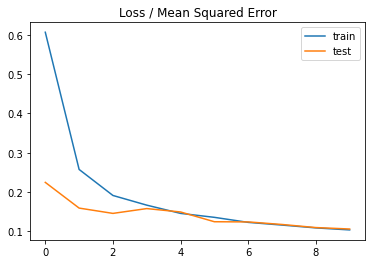

In [ ]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Observation:
Note we have consider only 'review_list' feature, using single feature model is learning good.
There is small difference between Training MSE value (0.031) and Testing MSE (0.105).
Model is good; As no of epoch increase it starts overfitting.

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/MyDrive/Restaurant Rating Prediction/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Restaurant Rating Prediction/model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from keras.models import model_from_json

# load json and create model
json_file = open('/content/drive/MyDrive/Restaurant Rating Prediction/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Restaurant Rating Prediction/model.h5")

In [ ]:
y_pred_lstm = loaded_model.predict(X_test_pad)

In [ ]:
y_pred_lstm = y_pred_lstm.flatten()

In [ ]:
y_pred_lstm.shape, y_test.shape

((4485,), (4485,))

In [ ]:
lstmpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_lstm })
lstmpred

,actual,pred
2260,3.9,3.913628
14501,4.1,4.022882
2907,3.1,3.697639
13297,4.4,4.434680
5488,3.4,3.722359
...,...,...
6812,4.1,3.822784
5667,4.1,3.923561
10189,3.5,3.424592
8065,4.2,3.982383


Weight Visualisation

In [ ]:
w = loaded_model.get_weights()

In [ ]:
h1 = w[0].flatten().reshape(-1,1)
h2 = w[1].flatten().reshape(-1,1)
h3 = w[2].flatten().reshape(-1,1)
h4 = w[3].flatten().reshape(-1,1)
h5 = w[4].flatten().reshape(-1,1)
h6 = w[5].flatten().reshape(-1,1)

Text(0.5, 0, 'l3')

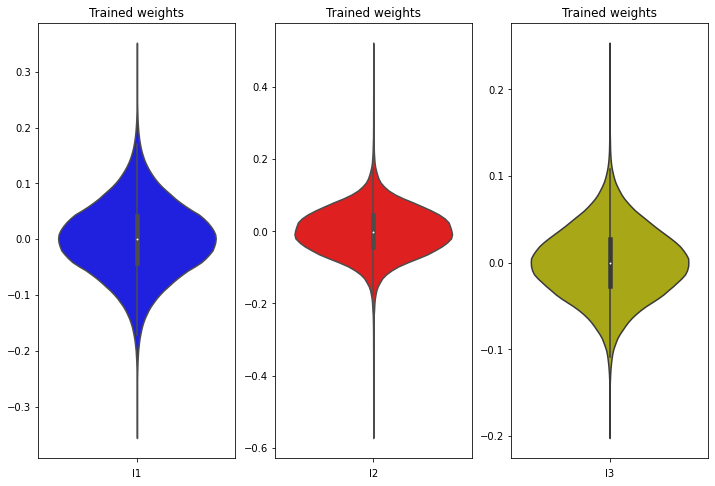

In [ ]:
# fig = plt.figure(figsize=(12,8))
fig= plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
ax=sns.violinplot(y=h1, color='b')
plt.title('Trained weights')
plt.xlabel('l1')

plt.subplot(1,3,2)
ax=sns.violinplot(y=h2, color='r')
plt.title('Trained weights')
plt.xlabel('l2')

plt.subplot(1,3,3)
ax=sns.violinplot(y=h3, color='y')
plt.title('Trained weights')
plt.xlabel('l3')


In [ ]:
X_train

10397    today oct lazy saturday thought eating wholeso...
1690     good breakfast place decent food nthe food ave...
8439     planing treat friends family always look place...
6808     colleague quick lunch prices worth place small...
9573     hoppipola guys magical sweet helpful people ar...
                               ...                        
13123    ordered place kheema biryani authentic tasty q...
3264     order chicken tikka roll good portion small on...
9845     wanted eat japanese long time wanted find new ...
10799                                                     
2732     early morning breakfast best place yummy break...
Name: preprocessed_reviews, Length: 10465, dtype: object

Let's experiment with GRUs.

5.2 GRU Model

In [ ]:
max_review_length = 600
top_words = 10000

tk = Tokenizer(lower = True, num_words= top_words)
tk.fit_on_texts(X_train)
X_train_seq = tk.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_review_length)
X_test_seq = tk.texts_to_sequences(x_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_review_length)


print('train data shape ', X_train_pad.shape)
print('test data shape', X_test_pad.shape)



train data shape  (10465, 600)
test data shape (4485, 600)


In [ ]:

# create the model
embedding_vecor_length = 256
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(GRU(200))  # returns a sequence of vectors of dimension 32
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 600, 256)          2560256   
_________________________________________________________________
gru (GRU)                    (None, 200)               274800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 2,835,257
Trainable params: 2,835,257
Non-trainable params: 0
_________________________________________________________________
None


GRU parameter calculation:
embedding_vecor_length = 256 top words = 10000+1 = 10001

params at emdedding layers = 10001* 256 = 2560256

lstm params = 3(nm + n^2 + n) where, n = no of units;
m = input dimensions

here lstm units (n) = 200 and m = 256 dimensions params at lstm_1: 3 (200 * 256 + 200^2 + 200) = 274200

at dropout there no training happens, so params 0

at dense,

(input dim + 1 (bias))* no of units

(200+1) * 1 = 201

final trainable params, (2560256 + 274200 + 201) = 2,834,657

In [ ]:
print(X_train_pad.shape,  y_train.shape)
X_test_pad.shape, y_test.shape

(10465, 600) (10465,)


((4485, 600), (4485,))

In [ ]:
filepath = '/content/drive/MyDrive/Restaurant Rating Prediction/gru-weights.best.hdf5'

es =EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# fit model
history = model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=10, verbose=1,callbacks = [checkpoint,es])
## Train: 0.041, Test: 0.074
### start execution 1.50pm

Epoch 1/10
328/328 [==============================] - 633s 2s/step - loss: 0.7756 - val_loss: 0.1554

Epoch 00001: val_loss improved from inf to 0.15540, saving model to /content/drive/MyDrive/Restaurant Rating Prediction/gru-weights.best.hdf5
Epoch 2/10
328/328 [==============================] - 630s 2s/step - loss: 0.1967 - val_loss: 0.1241

Epoch 00002: val_loss improved from 0.15540 to 0.12408, saving model to /content/drive/MyDrive/Restaurant Rating Prediction/gru-weights.best.hdf5
Epoch 3/10
328/328 [==============================] - 629s 2s/step - loss: 0.1648 - val_loss: 0.1225

Epoch 00003: val_loss improved from 0.12408 to 0.12253, saving model to /content/drive/MyDrive/Restaurant Rating Prediction/gru-weights.best.hdf5
Epoch 4/10
328/328 [==============================] - 633s 2s/step - loss: 0.1409 - val_loss: 0.1176

Epoch 00004: val_loss improved from 0.12253 to 0.11765, saving model to /content/drive/MyDrive/Restaurant Rating Prediction/gru-weights.best.hdf5
Epoch 5/10
3

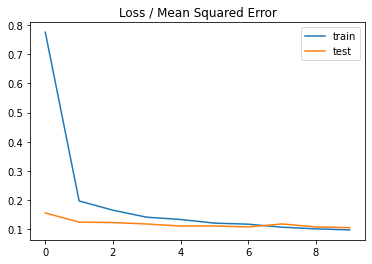

In [ ]:
from matplotlib import pyplot

# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# evaluate the model
train_mse = model.evaluate(X_train_pad, y_train, verbose=1)
test_mse = model.evaluate(X_test_pad, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_mse,test_mse))

141/141 [==============================] - 68s 479ms/step - loss: 0.1050
Train: 0.036, Test: 0.105


Observation
There is not much difference between LSTM and GRU output.
GRU model reacted quite similar to LSTM.
Train MSE = 0.036 and Test MSE = 0.105


In [ ]:
from prettytable import PrettyTable


x = PrettyTable()
x.field_names =  ['Model with NLP','MSE','Train MSE','Test MSE']

x.add_row(["Linear Regression ", 64.2067,'--','--'])
x.add_row(["Random Forest Regressor", 0.0732 ,'--','--'])
x.add_row(["LSTM ",'--',0.031,0.105])
x.add_row(["GRU", '--',0.036,0.105])





print('\n')
print(x)



+-------------------------+---------+-----------+----------+
|      Model with NLP     |   MSE   | Train MSE | Test MSE |
+-------------------------+---------+-----------+----------+
|    Linear Regression    | 64.2067 |     --    |    --    |
| Random Forest Regressor |  0.0732 |     --    |    --    |
|          LSTM           |    --   |   0.031   |  0.105   |
|           GRU           |    --   |   0.036   |  0.105   |
+-------------------------+---------+-----------+----------+


Here we can conclude that **LSTM** is best model with lowest **test MSE = 0.105**